In [1]:
import numpy as np
import pandas as pd

In [25]:
data = pd.read_csv('E:\KULIAH\MAGISTER\ASDOS_DATMIN\Basic_Visualization.csv')
data

,Lokasi Dealer,Tipe,Sub Kategori,Warna,Jenis Kelamin,Kota,Propinsi,Usia,Jenis Pembayaran,Pekerjaan,Pendidikan,Harga Jual
0,BOJONEGORO,BYSON FI (2UP1),NAKED,HITAM,PEREMPUAN,BOJONEGORO,JAWA TIMUR,41,TUNAI,WIRASWASTA,SMA,22440000
1,JOMBANG,FINO PREMIUM FI (1YD1),MATIC,HITAM,LAKI-LAKI,JOMBANG,JAWA TIMUR,56,TUNAI,PNS,SMA,16490000
2,MOJOKERTO,FINO PREMIUM FI (1YD1),MATIC,HITAM,LAKI-LAKI,MOJOKERTO,JAWA TIMUR,24,KREDIT,PELAJAR/MAHASISWA,SMA,16490000
3,SURABAYA,FINO PREMIUM FI (1YD1),MATIC,HITAM,LAKI-LAKI,SURABAYA,JAWA TIMUR,23,KREDIT,LAIN-LAIN,SMA,16490000
4,BOJONEGORO,FINO PREMIUM FI (1YD1),MATIC,HITAM,PEREMPUAN,BOJONEGORO,JAWA TIMUR,23,KREDIT,KARYAWAN SWASTA,SMA,16490000
...,...,...,...,...,...,...,...,...,...,...,...,...
165,MOJOKERTO,NEW VIXION ADVANCE GP - MOVISTAR (2TP3),NAKED,BIRU,PEREMPUAN,MOJOKERTO,JAWA TIMUR,41,TUNAI,IBU RUMAH TANGGA,SMA,26225000
166,SIDOARJO,X-RIDE (2BU1),MATIC,BIRU,LAKI-LAKI,SIDOARJO,JAWA TIMUR,23,KREDIT,PELAJAR/MAHASISWA,SARJANA (S1),16405000
167,SURABAYA,X-RIDE (2BU1),MATIC,BIRU,LAKI-LAKI,SURABAYA,JAWA TIMUR,25,KREDIT,LAIN-LAIN,SMA,16405000
168,SURABAYA,X-RIDE (2BU1),MATIC,HITAM,LAKI-LAKI,SIDOARJO,JAWA TIMUR,35,KREDIT,KARYAWAN SWASTA,SARJANA (S1),16405000


In [4]:
data.isnull().sum()

Lokasi Dealer       0
Tipe                0
Sub Kategori        0
Warna               0
Jenis Kelamin       0
Kota                0
Propinsi            0
Usia                0
Jenis Pembayaran    0
Pekerjaan           0
Pendidikan          0
Harga Jual          0
dtype: int64

C:\Users\Wiji\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


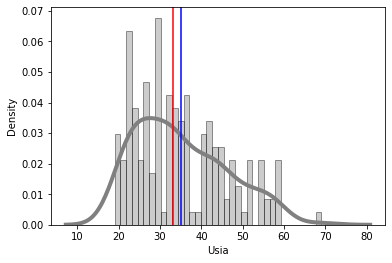

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(data['Usia'], hist=True, kde=True, 
             bins=int(180/5), color = 'grey', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(data['Usia'].mean(),color='blue') 
plt.axvline(data['Usia'].median(),color='red')

In [7]:
#Variabel numerik aja
data_numerik = data.select_dtypes([np.number])
data_numerik.head(3)

,Usia,Harga Jual
0,41,22440000
1,56,16490000
2,24,16490000


In [9]:
# feature selection - correlation thresholds: buang variabel yang punya korelasi tinggi dengan yang lain
def find_correlation(df, thresh=0.9):    
    corrMatrix = df.corr()
    corrMatrix.loc[:,:] =  np.tril(corrMatrix, k=-1)
    already_in = set()
    result = []
    for col in corrMatrix:
        perfect_corr = corrMatrix[col][corrMatrix[col] > thresh].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

find_correlation(data_numerik,thresh=0.9)

[]

In [ ]:
# buang variabel
data_numerik.drop(['usia'],axis=1,inplace=True)
data_numerik.head(3)

In [22]:
# feature selection - variance thresholds: buang varians kecil
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold
thresholder = VarianceThreshold(0.1)
data_numerik_hv = thresholder.fit_transform(data_numerik)
data_numerik_hv_df = pd.DataFrame(merged_hv)
data_numerik_hv_df

,0,1
0,41,22440000
1,56,16490000
2,24,16490000
3,23,16490000
4,23,16490000
...,...,...
165,41,26225000
166,23,16405000
167,25,16405000
168,35,16405000
